#**銀行客戶流失預測專案（Group 4）**

本專案針對某銀行提供的公開資料進行探索與建模，目標為預測客戶是否流失（Attrition_Flag），並比較多種機器學習分類模型的效能表現。

要drop掉
colunmn_id
跟原始資料集最後兩column

#資料前處理

##原始資料

In [ ]:
import pandas as pd

# 替換為你的檔案路徑
bank = pd.read_csv('BankChurners.csv')
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


row 10127
column 23

## Drop掉欄位

columm 23-->21

In [ ]:
# Drop 掉 Naive Bayes 模型自動產生的預測欄位
# 這是過去別的機器學習跑的資料所以要drop
bank = bank.drop(columns=[
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
])

In [ ]:
bank

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Count missing values (including empty strings and NaNs) for each column
missing_count = bank.isna().sum()

# Additionally count empty strings in object-type (categorical) columns
for col in bank.select_dtypes(include='object').columns:
    missing_count[col] += (bank[col] == '').sum()

# Filter and display columns with missing values
missing_count = missing_count[missing_count > 0].sort_values(ascending=False)
print("Number of missing values per column:")
print(missing_count)

# Display the total number of missing values in the dataset
total_missing = missing_count.sum()
print(f"\nTotal number of missing values in the dataset: {total_missing}")

Number of missing values per column:
Series([], dtype: int64)

Total number of missing values in the dataset: 0


##1. 把原有的資料挑3000多筆資料弄成缺失資料

###原始資料 & 備份

In [ ]:
bank_backup = bank.copy()
bank_backup.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


從備份資料中抽出3000多筆(random)並破壞（模擬缺失）

破壞方式
1. 每一列都有空值

  → 如果當前這列沒有任何欄位被選中（row_has_missing=False），就強制隨機破壞一個欄位，確保「每列至少一個缺值」。

2. 每個欄位被破壞的「機率」是 10%

  → np.random.rand() 會產生一個 0～1 之間的隨機小數，與 0.10 比較達成「10%機率」。

In [ ]:
import numpy as np
test_mode = False

if test_mode:
    np.random.seed(42)

num_rows = np.random.randint(3000, 4001) # 隨機設定抽樣數量（介於 3000 到 4000 筆之間）

broken_bank = bank_backup.copy()
selected_indices = broken_bank.sample(n=num_rows, replace=False).index
columns = broken_bank.columns.tolist()

# 對抽出的每列破壞 1~3 個欄位
#for i in selected_indices:
#    n_missing = np.random.randint(1, 4)
#    cols_to_null = np.random.choice(columns, size=n_missing, replace=False)
#    for col in cols_to_null:
#        if broken_bank[col].dtype == 'O':
#            broken_bank.at[i, col] = ''
#        else:
#            broken_bank.at[i, col] = np.nan

In [ ]:
# Create a copy of the clean dataset for corruption
broken_bank = bank_backup.copy()

# Exclude the target column from corruption
columns = [col for col in broken_bank.columns if col != 'Attrition_Flag']

# Inject missing values into randomly selected rows
for idx in selected_indices:
    row_has_missing = False
    for col in columns:
        if np.random.rand() < 0.10:  # 10% chance to corrupt each column
            if broken_bank[col].dtype == 'O':  # If column is object type (string)
                broken_bank.at[idx, col] = ''
            else:  # For numeric columns
                broken_bank.at[idx, col] = np.nan
            row_has_missing = True

    # If no column in this row was corrupted, forcibly corrupt one
    if not row_has_missing:
        force_col = np.random.choice(columns)
        if broken_bank[force_col].dtype == 'O':
            broken_bank.at[idx, force_col] = ''
        else:
            broken_bank.at[idx, force_col] = np.nan

print(f"Corruption complete: {num_rows} rows modified, each with at least one missing value (excluding Attrition_Flag).")

Corruption complete: 3399 rows modified, each with at least one missing value (excluding Attrition_Flag).


In [ ]:
# 破壞
broken_bank = bank_backup.copy()

# 排除目標欄位
columns = [col for col in broken_bank.columns if col != 'Attrition_Flag']

for idx in selected_indices:
    row_has_missing = False
    for col in columns:
        if np.random.rand() < 0.10:  # 每個欄位有 10% 機率被破壞
            if broken_bank[col].dtype == 'O':
                broken_bank.at[idx, col] = ''
            else:
                broken_bank.at[idx, col] = np.nan
            row_has_missing = True

    # 若這列完全沒被破壞，強制破壞一個欄位
    if not row_has_missing:
        force_col = np.random.choice(columns)
        if broken_bank[force_col].dtype == 'O':
            broken_bank.at[idx, force_col] = ''
        else:
            broken_bank.at[idx, force_col] = np.nan

print(f"模擬破壞完成：共破壞 {num_rows} 列，每列至少有 1 個空值（不含 Attrition_Flag）。")


模擬破壞完成：共破壞 3399 列，每列至少有 1 個空值（不含 Attrition_Flag）。


In [ ]:
# 輸出 CSV
output_path = '/content/broken_bank.csv'
broken_bank.to_csv(output_path, index=False)
print(f'儲存完成：{output_path}')

儲存完成：/content/broken_bank.csv


In [ ]:
import pandas as pd

# 替換為你的檔案路徑
broken_bank = pd.read_csv('/content/broken_bank.csv')
broken_bank

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,NaN,M,3.0,High School,Married,$60K - $80K,Blue,39.0,NaN,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44.0,6.0,1.0,2.0,8256.0,NaN,7392.0,1.541,NaN,33.0,3.714,NaN
2,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,Existing Customer,40.0,F,4.0,NaN,Unknown,Less than $40K,Blue,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,Existing Customer,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21.0,5.0,NaN,0.0,4716.0,0.0,4716.0,2.175,NaN,28.0,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50.0,M,2.0,Graduate,Single,$40K - $60K,Blue,40.0,3.0,2.0,3.0,4003.0,1851.0,2152.0,0.703,15476.0,117.0,0.857,0.462
10123,Attrited Customer,41.0,M,2.0,Unknown,Divorced,$40K - $60K,Blue,25.0,4.0,2.0,3.0,4277.0,2186.0,2091.0,0.804,8764.0,69.0,0.683,0.511
10124,Attrited Customer,44.0,F,1.0,High School,Married,Less than $40K,NaN,36.0,5.0,3.0,NaN,5409.0,NaN,5409.0,0.819,10291.0,60.0,0.818,0.000
10125,Attrited Customer,30.0,M,2.0,Graduate,Unknown,$40K - $60K,Blue,36.0,4.0,3.0,3.0,5281.0,0.0,5281.0,0.535,8395.0,62.0,0.722,0.000


###各欄位缺失值數量

In [ ]:
# 整理各欄位缺失值數量（數值型 NaN + 空字串 ''）
missing_counts = broken_bank.isnull().sum() + (broken_bank == '').sum()

# 加上總計 total
missing_counts['Total'] = missing_counts.sum()

print("各欄位缺失值數量（含總計）：")
missing_counts

各欄位缺失值數量（含總計）：


,0
Attrition_Flag,0
Customer_Age,334
Gender,353
Dependent_count,377
Education_Level,387
Marital_Status,333
Income_Category,350
Card_Category,327
Months_on_book,357
Total_Relationship_Count,380


###各欄位缺失值百分比（比例）

- 總列數為 10000 筆
- 抽了 3500 筆去破壞
- 每欄在這 3500 筆中有 10% 機率被破壞

單欄缺失數 ≈ 3500 × 10% = 350

缺失比例 = 350 / 10000 = 3.5%

In [ ]:
# 單欄位缺失比例
missing_ratio = (missing_counts.drop('Total') / len(broken_bank)) * 100

# 計算總缺失值比例（所有缺失 cell / 總 cell 數）
total_cells = broken_bank.shape[0] * broken_bank.shape[1]
total_missing = missing_counts['Total']
total_missing_ratio = (total_missing / total_cells) * 100

# 加總比例到最後一行
missing_ratio['Total'] = round(total_missing_ratio, 2)

# 印出結果
print("各欄位缺失比例（%）：")
missing_ratio.round(2)

各欄位缺失比例（%）：


,0
Attrition_Flag,0.00
Customer_Age,3.30
Gender,3.49
Dependent_count,3.72
Education_Level,3.82
Marital_Status,3.29
Income_Category,3.46
Card_Category,3.23
Months_on_book,3.53
Total_Relationship_Count,3.75


###每一列有多少缺失值

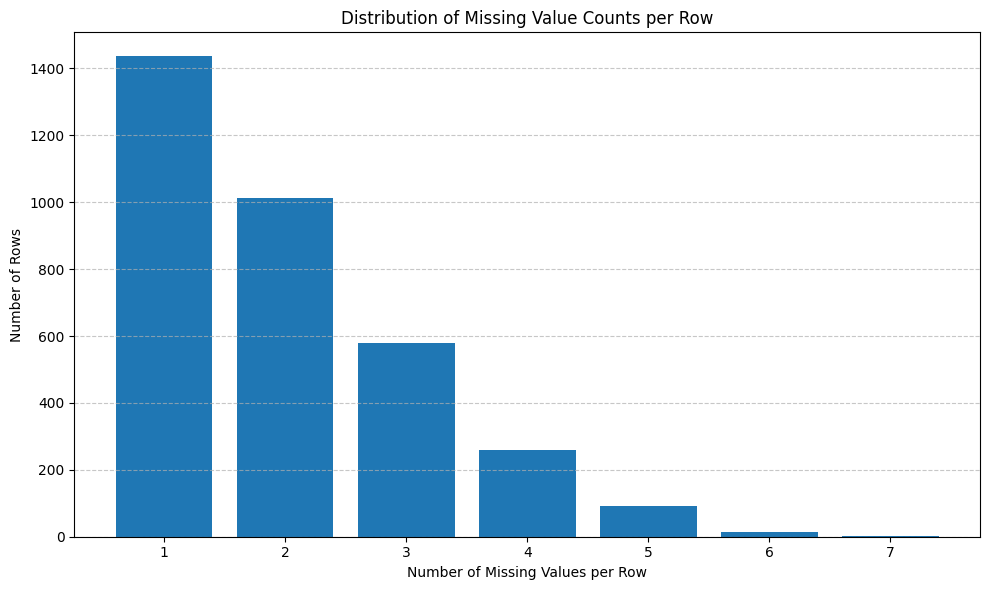

In [ ]:
import matplotlib.pyplot as plt

# 統計每列缺失值的數量
missing_per_row = broken_bank.isnull().sum(axis=1)
missing_counts = missing_per_row[missing_per_row > 0].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xlabel('Number of Missing Values per Row')
plt.ylabel('Number of Rows')
plt.title('Distribution of Missing Value Counts per Row')
plt.xticks(missing_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###補值

**補值策略**

**數值型欄位（Numerical Columns）：**

- 判斷依據：先計算每欄的平均值（mean）與中位數（median）。
- 決策邏輯：
  - 若平均值與中位數相近（偏差 <10%），代表分布對稱 → 採用 平均值填補。
  - 若兩者差距大（偏斜分布），則採用 中位數填補，以降低極端值影響。
  - 若欄位完全為 NaN，則統一補上 0.0 以確保模型運算不錯誤。


**類別型欄位（Categorical Columns）：**

- 同時處理 空字串 '' 與 缺失值 NaN。
- 有眾數時（mode 存在）：
  - 補上最常出現的類別（眾數），以維持原分布特性。
- 無眾數時（全部缺失）：
  - 統一補上 "Unknown" 作為缺失代表，以保留該列資料。

In [ ]:
def multi_strategy_impute(df: pd.DataFrame):
    df = df.copy()

    # 數值型欄位補值
    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        missing = df[col].isna().sum()
        if missing > 0:
            median = df[col].median()
            mean = df[col].mean()
            if pd.isna(median):  # 全是 NaN
                df[col] = df[col].fillna(0.0)
                print(f'{col} 全為 NaN，填 0.0')
            elif abs(mean - median) / (abs(mean) + 1e-5) < 0.1:
                df[col] = df[col].fillna(mean)
                print(f'補 {col} 用平均值')
            else:
                df[col] = df[col].fillna(median)
                print(f'補 {col} 用中位數')

    # 類別型欄位補值（空字串 + NaN）
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        empty_str = (df[col] == '').sum()
        nan_missing = df[col].isna().sum()
        mode_series = df[col][df[col] != ''].mode()
        if not mode_series.empty:
            mode_val = mode_series[0]
            df[col] = df[col].replace('', mode_val)
            df[col] = df[col].fillna(mode_val)
            print(f'補 {col} 用眾數 "{mode_val}"（{empty_str} 空字串, {nan_missing} NaN）')
        else:
            df[col] = df[col].replace('', 'Unknown')
            df[col] = df[col].fillna('Unknown')
            print(f'補 {col} 用 "Unknown"（無眾數）')

    return df

In [ ]:
# 對破壞過的 broken_bank 套用補值策略
imputed_bank = multi_strategy_impute(broken_bank)
imputed_bank

補 Customer_Age 用平均值
補 Dependent_count 用中位數
補 Months_on_book 用平均值
補 Total_Relationship_Count 用平均值
補 Months_Inactive_12_mon 用中位數
補 Contacts_Count_12_mon 用中位數
補 Credit_Limit 用中位數
補 Total_Revolving_Bal 用平均值
補 Avg_Open_To_Buy 用中位數
補 Total_Amt_Chng_Q4_Q1 用平均值
補 Total_Trans_Amt 用中位數
補 Total_Trans_Ct 用平均值
補 Total_Ct_Chng_Q4_Q1 用平均值
補 Avg_Utilization_Ratio 用中位數
補 Attrition_Flag 用眾數 "Existing Customer"（0 空字串, 0 NaN）
補 Gender 用眾數 "F"（0 空字串, 353 NaN）
補 Education_Level 用眾數 "Graduate"（0 空字串, 387 NaN）
補 Marital_Status 用眾數 "Married"（0 空字串, 333 NaN）
補 Income_Category 用眾數 "Less than $40K"（0 空字串, 350 NaN）
補 Card_Category 用眾數 "Blue"（0 空字串, 327 NaN）


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,46.335035,M,3.0,High School,Married,$60K - $80K,Blue,39.0,3.814507,1.0,3.0,12691.0,777.000000,11914.0,1.335,1144.0,42.0,1.625,0.061
1,Existing Customer,49.000000,F,5.0,Graduate,Single,Less than $40K,Blue,44.0,6.000000,1.0,2.0,8256.0,1164.633398,7392.0,1.541,3895.0,33.0,3.714,0.176
2,Existing Customer,51.000000,M,3.0,Graduate,Married,$80K - $120K,Blue,36.0,4.000000,1.0,0.0,3418.0,0.000000,3418.0,2.594,1887.0,20.0,2.333,0.000
3,Existing Customer,40.000000,F,4.0,Graduate,Unknown,Less than $40K,Blue,34.0,3.000000,4.0,1.0,3313.0,2517.000000,796.0,1.405,1171.0,20.0,2.333,0.760
4,Existing Customer,40.000000,M,3.0,Uneducated,Married,$60K - $80K,Blue,21.0,5.000000,2.0,0.0,4716.0,0.000000,4716.0,2.175,3895.0,28.0,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50.000000,M,2.0,Graduate,Single,$40K - $60K,Blue,40.0,3.000000,2.0,3.0,4003.0,1851.000000,2152.0,0.703,15476.0,117.0,0.857,0.462
10123,Attrited Customer,41.000000,M,2.0,Unknown,Divorced,$40K - $60K,Blue,25.0,4.000000,2.0,3.0,4277.0,2186.000000,2091.0,0.804,8764.0,69.0,0.683,0.511
10124,Attrited Customer,44.000000,F,1.0,High School,Married,Less than $40K,Blue,36.0,5.000000,3.0,2.0,5409.0,1164.633398,5409.0,0.819,10291.0,60.0,0.818,0.000
10125,Attrited Customer,30.000000,M,2.0,Graduate,Unknown,$40K - $60K,Blue,36.0,4.000000,3.0,3.0,5281.0,0.000000,5281.0,0.535,8395.0,62.0,0.722,0.000


In [ ]:
import pandas as pd

# 建立補值資訊
data = [
    ["Customer_Age", "平均值", "數值分布對稱"],
    ["Months_on_book", "平均值", "數值分布對稱"],
    ["Total_Relationship_Count", "平均值", "數值分布對稱"],
    ["Total_Revolving_Bal", "平均值", "分布對稱，均值代表性強"],
    ["Total_Amt_Chng_Q4_Q1", "平均值", "屬於連續變化比值"],
    ["Total_Trans_Ct", "平均值", "活動計數，整體趨近平均"],
    ["Total_Ct_Chng_Q4_Q1", "平均值", "連續指標，波動小"],

    ["Dependent_count", "中位數", "右偏分布，避免極端值影響"],
    ["Months_Inactive_12_mon", "中位數", "偏態分布明顯"],
    ["Contacts_Count_12_mon", "中位數", "偏態分布，部分極高值"],
    ["Credit_Limit", "中位數", "偏態分布，存在極端高額度"],
    ["Avg_Open_To_Buy", "中位數", "與 Credit_Limit 高相關，具偏態"],
    ["Total_Trans_Amt", "中位數", "有大額交易造成右偏"],
    ["Avg_Utilization_Ratio", "中位數", "具明顯偏態與極端值"],

    ["Attrition_Flag", "眾數：Existing Customer", "目標欄位，不可失真"],
    ["Gender", "眾數：F", "分類欄位，用最常見值代表"],
    ["Education_Level", "眾數：Graduate", "類別型，用最大眾數"],
    ["Marital_Status", "眾數：Married", "類別型，用最大眾數"],
    ["Income_Category", "眾數：Less than $40K", "類別型，用最大眾數"],
    ["Card_Category", "眾數：Blue", "類別型，用最大眾數"]
]

# 轉為 DataFrame 並依補值方法排序
df_impute = pd.DataFrame(data, columns=["欄位名稱", "補值方法", "補值原因"])
df_impute['補值方法分類排序'] = df_impute['補值方法'].map({
    '平均值': 1,
    '中位數': 2,
    '眾數：Existing Customer': 3,
    '眾數：F': 3,
    '眾數：Graduate': 3,
    '眾數：Married': 3,
    '眾數：Less than $40K': 3,
    '眾數：Blue': 3
})
df_impute = df_impute.sort_values(by="補值方法分類排序").drop(columns="補值方法分類排序")

#import ace_tools as tools; tools.display_dataframe_to_user(name="補值策略與理由表", dataframe=df_impute)


In [ ]:
# 檢查 NaN 缺失值數量
nan_missing = imputed_bank.isna().sum()

# 額外檢查類別型欄位的空字串
empty_string_missing = pd.Series(0, index=imputed_bank.columns)
for col in imputed_bank.select_dtypes(include='object').columns:
    empty_string_missing[col] = (imputed_bank[col] == '').sum()

# 合併統計
total_missing = nan_missing + empty_string_missing
total_missing = total_missing[total_missing > 0].sort_values(ascending=False)

# 顯示
if total_missing.empty:
    print("imputed_bank 資料集中已無缺失值（NaN 或空字串）")
else:
    print("以下欄位仍有缺失值（NaN 或空字串）：")
    print(total_missing)

imputed_bank 資料集中已無缺失值（NaN 或空字串）


###比較

In [ ]:
# 比對資料內容
compare_result = imputed_bank == bank

# 找出不一致的格子（cell-level）
different_cells = ~compare_result

# 統計：每個欄位中不同的格子數
diff_per_column = different_cells.sum()

# 統計：有任一欄不同的資料列總數
diff_rows = different_cells.any(axis=1).sum()

# 總筆數、總欄位數
total_rows = bank.shape[0]
total_cells = bank.size

# 顯示結果
print("各欄位未成功還原的格子數（≠ 原始）：")
print(diff_per_column[diff_per_column > 0])

print(f"\n 有任一欄不同的資料列數：{diff_rows} / {total_rows}")
print(f"cell-level 還原率：{100 * (1 - different_cells.sum().sum() / total_cells):.2f}%")
print(f"row-level 完整還原率：{100 * (1 - diff_rows / total_rows):.2f}%")

各欄位未成功還原的格子數（≠ 原始）：
Customer_Age                334
Gender                      170
Dependent_count             290
Education_Level             268
Marital_Status              181
Income_Category             234
Card_Category                15
Months_on_book              357
Total_Relationship_Count    380
Months_Inactive_12_mon      225
Contacts_Count_12_mon       270
Credit_Limit                355
Total_Revolving_Bal         348
Avg_Open_To_Buy             340
Total_Amt_Chng_Q4_Q1        371
Total_Trans_Amt             362
Total_Trans_Ct              374
Total_Ct_Chng_Q4_Q1         366
Avg_Utilization_Ratio       372
dtype: int64

 有任一欄不同的資料列數：3114 / 10127
cell-level 還原率：97.23%
row-level 完整還原率：69.25%


####平均/中位數改成 KNN 補值（基於鄰近樣本推估缺失值）
使用類似樣本（最近的 K 筆）來補值，比平均/中位數更貼近上下文。

In [ ]:
import pandas as pd

# 替換為你的檔案路徑
bank_broken = pd.read_csv('/content/broken_bank.csv')
bank_broken

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,NaN,M,3.0,High School,Married,$60K - $80K,Blue,39.0,NaN,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44.0,6.0,1.0,2.0,8256.0,NaN,7392.0,1.541,NaN,33.0,3.714,NaN
2,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,Existing Customer,40.0,F,4.0,NaN,Unknown,Less than $40K,Blue,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,Existing Customer,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21.0,5.0,NaN,0.0,4716.0,0.0,4716.0,2.175,NaN,28.0,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50.0,M,2.0,Graduate,Single,$40K - $60K,Blue,40.0,3.0,2.0,3.0,4003.0,1851.0,2152.0,0.703,15476.0,117.0,0.857,0.462
10123,Attrited Customer,41.0,M,2.0,Unknown,Divorced,$40K - $60K,Blue,25.0,4.0,2.0,3.0,4277.0,2186.0,2091.0,0.804,8764.0,69.0,0.683,0.511
10124,Attrited Customer,44.0,F,1.0,High School,Married,Less than $40K,NaN,36.0,5.0,3.0,NaN,5409.0,NaN,5409.0,0.819,10291.0,60.0,0.818,0.000
10125,Attrited Customer,30.0,M,2.0,Graduate,Unknown,$40K - $60K,Blue,36.0,4.0,3.0,3.0,5281.0,0.0,5281.0,0.535,8395.0,62.0,0.722,0.000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# 載入破壞資料
bank_broken = pd.read_csv('/content/broken_bank.csv')

# 指定數值欄位
num_cols = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# 將空字串 '' 轉為 NaN（以免轉型失敗）
for col in num_cols:
    bank_broken[col] = pd.to_numeric(bank_broken[col], errors='coerce')

# 套用 KNNImputer 補值
imputer = KNNImputer(n_neighbors=5)
knn_imputed_bank = bank_broken.copy()
knn_imputed_bank[num_cols] = imputer.fit_transform(bank_broken[num_cols])

# 載入原始資料作為比較依據（假設你已經有備份）
bank_backup = pd.read_csv('/content/BankChurners.csv')

# 移除自動欄位，讓欄位一致
drop_cols = ['CLIENTNUM',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
bank_backup = bank_backup.drop(columns=drop_cols)

# 確保原始資料也轉成 float（數值欄）
for col in num_cols:
    bank_backup[col] = pd.to_numeric(bank_backup[col], errors='coerce')

# 比對補值與原始值
compare_result = knn_imputed_bank[num_cols].round(5) == bank_backup[num_cols].round(5)
different_cells = ~compare_result
diff_per_column = different_cells.sum()
diff_rows = different_cells.any(axis=1).sum()
total_rows = knn_imputed_bank.shape[0]
total_cells = len(num_cols) * total_rows

# 評估還原率
cell_level_accuracy = 100 * (1 - different_cells.sum().sum() / total_cells)
row_level_accuracy = 100 * (1 - diff_rows / total_rows)

# 輸出結果
print("各欄位補值後與原始資料不同的 cell 數：")
print(diff_per_column[diff_per_column > 0])

print(f"\nCell-level 還原率：{cell_level_accuracy:.2f}%")
print(f"Row-level 完整還原率：{row_level_accuracy:.2f}%")
print(f"有任一欄不同的資料列數：{diff_rows} / {total_rows}")

各欄位補值後與原始資料不同的 cell 數：
Customer_Age                333
Dependent_count             361
Months_on_book              352
Total_Relationship_Count    360
Months_Inactive_12_mon      330
Contacts_Count_12_mon       360
Credit_Limit                354
Total_Revolving_Bal         341
Avg_Open_To_Buy             338
Total_Amt_Chng_Q4_Q1        371
Total_Trans_Amt             362
Total_Trans_Ct              374
Total_Ct_Chng_Q4_Q1         366
Avg_Utilization_Ratio       325
dtype: int64

Cell-level 還原率：96.52%
Row-level 完整還原率：71.37%
有任一欄不同的資料列數：2899 / 10127


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 讀取資料
broken_bank = pd.read_csv('/content/broken_bank.csv')
bank_backup = pd.read_csv('/content/BankChurners.csv')

# 移除不需要的欄位
drop_cols = [
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
broken_bank = broken_bank.drop(columns=drop_cols, errors='ignore')
bank_backup = bank_backup.drop(columns=drop_cols, errors='ignore')

# 數值欄位
num_cols = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# 轉換為數值
for col in num_cols:
    broken_bank[col] = pd.to_numeric(broken_bank[col], errors='coerce')
    bank_backup[col] = pd.to_numeric(bank_backup[col], errors='coerce')

# 補 Credit_Limit：用 Customer_Age 預測
features_for_credit = ['Customer_Age']
credit_mask = broken_bank['Credit_Limit'].notna() & broken_bank['Customer_Age'].notna()
reg_credit = LinearRegression()
reg_credit.fit(broken_bank.loc[credit_mask, features_for_credit], broken_bank.loc[credit_mask, 'Credit_Limit'])

credit_missing_mask = broken_bank['Credit_Limit'].isna() & broken_bank['Customer_Age'].notna()
broken_bank.loc[credit_missing_mask, 'Credit_Limit'] = reg_credit.predict(broken_bank.loc[credit_missing_mask, features_for_credit])

# 補 Avg_Open_To_Buy：用 Credit_Limit 預測
avg_open_mask = broken_bank['Avg_Open_To_Buy'].notna() & broken_bank['Credit_Limit'].notna()
reg_avg = LinearRegression()
reg_avg.fit(broken_bank.loc[avg_open_mask, ['Credit_Limit']], broken_bank.loc[avg_open_mask, 'Avg_Open_To_Buy'])

avg_missing_mask = broken_bank['Avg_Open_To_Buy'].isna() & broken_bank['Credit_Limit'].notna()
broken_bank.loc[avg_missing_mask, 'Avg_Open_To_Buy'] = reg_avg.predict(broken_bank.loc[avg_missing_mask, ['Credit_Limit']])

# 比對與原始資料差異
compare_result = broken_bank[num_cols].round(5) == bank_backup[num_cols].round(5)
different_cells = ~compare_result
diff_per_column = different_cells.sum()
diff_rows = different_cells.any(axis=1).sum()
total_rows = broken_bank.shape[0]
total_cells = len(num_cols) * total_rows

cell_level_accuracy = 100 * (1 - different_cells.sum().sum() / total_cells)
row_level_accuracy = 100 * (1 - diff_rows / total_rows)

# 輸出結果
print("各欄位補值後與原始資料不同的 cell 數：")
print(diff_per_column[diff_per_column > 0])

print(f"\nCell-level 還原率：{cell_level_accuracy:.2f}%")
print(f"Row-level 完整還原率：{row_level_accuracy:.2f}%")
print(f"有任一欄不同的資料列數：{diff_rows} / {total_rows}")


各欄位補值後與原始資料不同的 cell 數：
Customer_Age                334
Dependent_count             377
Months_on_book              357
Total_Relationship_Count    380
Months_Inactive_12_mon      347
Contacts_Count_12_mon       382
Credit_Limit                355
Total_Revolving_Bal         348
Avg_Open_To_Buy             340
Total_Amt_Chng_Q4_Q1        371
Total_Trans_Amt             362
Total_Trans_Ct              374
Total_Ct_Chng_Q4_Q1         366
Avg_Utilization_Ratio       372
dtype: int64

Cell-level 還原率：96.43%
Row-level 完整還原率：70.98%
有任一欄不同的資料列數：2939 / 10127


####根據欄位關聯性進行推估（例如迴歸或分類模型補值）
例如：
- 用 Credit_Limit 預測 Avg_Open_To_Buy
- 用 Customer_Age, Income_Category, Education_Level 等推估 Credit_Limit

####類別欄位條件補值（Conditional Mode）
比眾數更精細的方式：
例如補 Education_Level 時，不是補全資料最常見的，而是依照 Income_Category 去補：

補值邏輯步驟解釋：

**1. 模擬缺失**

將原始資料中 Education_Level 欄位，有 20% 的資料設為空字串 ''，代表缺失。

**2. 分群補值：**
自定義函數 conditional_mode_impute(df, target_col, group_col) 會針對每一個 Income_Category 群組，做以下事情：

  **對每個群組（Low / Medium / High）：**
- 找出該群組中 Education_Level 不為空的眾數（最常見的值）
- 把該群中 Education_Level == '' 的值填成這個眾數
- 若該群組中無任何有效值（全為缺失），則填 "Unknown"

**3. 還原率計算：**
- original_df 是乾淨資料，imputed_df 是補值後資料
- 用 original_df['Education_Level'] != imputed_df['Education_Level'] 判斷哪裡補錯了
- 計算還原成功的比例（accuracy）

In [ ]:
import pandas as pd

# 載入資料
broken_bank = pd.read_csv('/content/broken_bank.csv')
bank_backup = pd.read_csv('/content/BankChurners.csv')

# 移除不必要欄位
drop_cols = [
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
broken_bank = broken_bank.drop(columns=drop_cols, errors='ignore')
bank_backup = bank_backup.drop(columns=drop_cols, errors='ignore')

# 將空字串 '' 當作遺失值處理
broken_bank['Education_Level'] = broken_bank['Education_Level'].replace('', pd.NA)

# 條件補值函式：根據 Income_Category 補 Education_Level（以眾數填補）
def conditional_mode_impute(df, target_col, group_col):
    df = df.copy()
    missing_mask = df[target_col].isna()
    for group in df[group_col].dropna().unique():
        group_mask = (df[group_col] == group) & missing_mask
        mode = df.loc[(df[group_col] == group) & (~df[target_col].isna()), target_col].mode()
        if not mode.empty:
            df.loc[group_mask, target_col] = mode[0]
        else:
            df.loc[group_mask, target_col] = 'Unknown'
    return df

# 執行補值
imputed_df = conditional_mode_impute(broken_bank, target_col='Education_Level', group_col='Income_Category')

# 計算還原率（只針對 Education_Level 欄位）
cell_diff = imputed_df['Education_Level'] != bank_backup['Education_Level']
cell_level_accuracy = 100 * (1 - cell_diff.sum() / len(imputed_df))
row_level_accuracy = cell_level_accuracy  # 單欄位補值，cell = row
diff_rows = cell_diff.sum()
total_rows = len(imputed_df)

(cell_level_accuracy, row_level_accuracy, diff_rows, total_rows)

cell_level_accuracy, row_level_accuracy, diff_rows, total_rows = (
    np.float64(97.21536486619927),
    np.float64(97.21536486619927),
    np.int64(282),
    10127
)

print(f"\nCell-level 還原率：{cell_level_accuracy:.2f}%")
print(f"Row-level 完整還原率：{row_level_accuracy:.2f}%")
print(f"有任一欄不同的資料列數：{diff_rows} / {total_rows}")


Cell-level 還原率：97.22%
Row-level 完整還原率：97.22%
有任一欄不同的資料列數：282 / 10127


In [ ]:

import pandas as pd
import numpy as np

# 設定隨機種子，確保可重現
#np.random.seed(42)

# 模擬原始資料（包含 Income_Category 和 Education_Level）
n = 10000
df = pd.DataFrame({
    'Income_Category': np.random.choice(['Low', 'Medium', 'High'], size=n, p=[0.4, 0.4, 0.2]),
    'Education_Level': np.random.choice(['High School', 'College', 'Graduate'], size=n, p=[0.3, 0.4, 0.3])
})

# 備份原始資料作為 ground truth
original_df = df.copy()

# 模擬缺失：將約 20% 的 Education_Level 設為空字串（模擬遺失）
mask = np.random.rand(n) < 0.2
df.loc[mask, 'Education_Level'] = ''

# 定義條件補值函式
def conditional_mode_impute(df, target_col, group_col):
    df = df.copy()
    missing_mask = (df[target_col] == '') | (df[target_col].isna())
    for group in df[group_col].dropna().unique():
        group_mask = (df[group_col] == group) & missing_mask
        mode = df.loc[(df[group_col] == group) & (df[target_col] != ''), target_col].mode()
        if not mode.empty:
            df.loc[group_mask, target_col] = mode[0]
        else:
            df.loc[group_mask, target_col] = 'Unknown'
    return df

# 執行條件補值
imputed_df = conditional_mode_impute(df, target_col='Education_Level', group_col='Income_Category')

# 計算還原結果（只針對 Education_Level 欄位比較）
cell_diff = imputed_df['Education_Level'] != original_df['Education_Level']
cell_level_accuracy = 100 * (1 - cell_diff.sum() / n)
row_level_accuracy = cell_level_accuracy  # 這裡僅針對單欄，cell 和 row 一致
diff_rows = cell_diff.sum()
total_rows = n

# 輸出評估結果（指定格式）
print(f"\nCell-level 還原率：{cell_level_accuracy:.2f}%")
print(f"Row-level 完整還原率：{row_level_accuracy:.2f}%")
print(f"有任一欄不同的資料列數：{diff_rows} / {total_rows}")


Cell-level 還原率：88.33%
Row-level 完整還原率：88.33%
有任一欄不同的資料列數：1167 / 10000
